In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras

from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

from sklearn.model_selection import train_test_split

np.random.seed(0)

In [2]:
# Loading the training and testing dataset
def load_data(file):
    df = pd.read_csv(file, sep=';')
    # Removing the quality column as it is not a continuous value
    df.drop("quality", axis=1, inplace=True)
    # Seperating the features and target values
    X = df.iloc[:, 0:df.shape[1]-1]
    y = df.iloc[:, df.shape[1]-1]
    # Separating the training (70%) and testing set (30%)
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=0)
    # Converting the input and output datatype to float
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    trainY = trainY.astype('float32')
    testY = testY.astype('float32')
    # Normalizing the input dataframe
    trainX = (trainX-trainX.mean()) / trainX.std()
    testX = (testX-testX.mean()) / testX.std()
    return trainX, trainY, testX, testY


# Defining the sequential model
def define_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(10,)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1))
    rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-07, decay=0.0)
    #adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)
    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=losses.mean_squared_error, optimizer='rmsprop', metrics=[metrics.mse])
    #mean_squared_error, mean_absolute_error, log_cosh
    return model


# Plotting the training and validation loss
def plot_losses(history):
    train_loss = history.history['mean_squared_error']
    val_loss = history.history['val_mean_squared_error']
    epochs = range(1, len(train_loss)+1)
    plt.figure(figsize=(10,5), facecolor='w')
    plt.plot(epochs, train_loss, 'bo', label='Training Loss')    #Blue dots
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')     #Red line
    plt.title('Training and Validation loss')
    plt.ylabel('MSE')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')
    #plt.savefig('train_loss.png') #saving plots
    plt.show()

In [3]:
# Building the model and running the model
def run_model():
    # Loading the dataset
    trainX, trainY, testX, testY = load_data("winequality-white.csv")
    # Defining the model
    model = define_model()
    # Fitting the model
    history = model.fit(trainX, trainY, epochs=130, batch_size=512, validation_split=0.3, verbose=0)
    # Plotting the learning curves
    plot_losses(history)
    model.save('regression.h5')

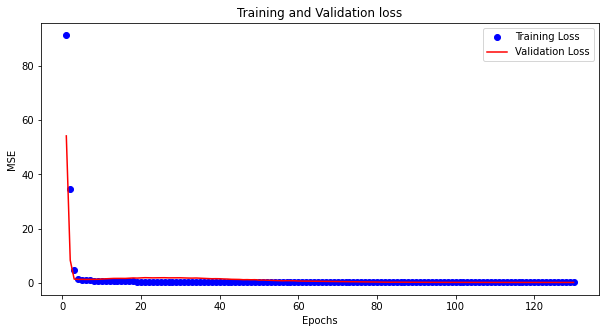

In [4]:
# Executing the model
run_model()

In [5]:
# Loading the saved model and evaluating on the test data
trainX, trainY, testX, testY = load_data("winequality-white.csv")
final_model = load_model('regression.h5')
_, final_mse  = final_model.evaluate(testX, testY, verbose=0)
print('Mean Squared Error = %.2f' % (final_mse))

Mean Squared Error = 0.19
